Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       277
           1       0.78      0.71      0.74       130
           2       0.92      0.93      0.92       177

    accuracy                           0.89       584
   macro avg       0.87      0.86      0.87       584
weighted avg       0.89      0.89      0.89       584



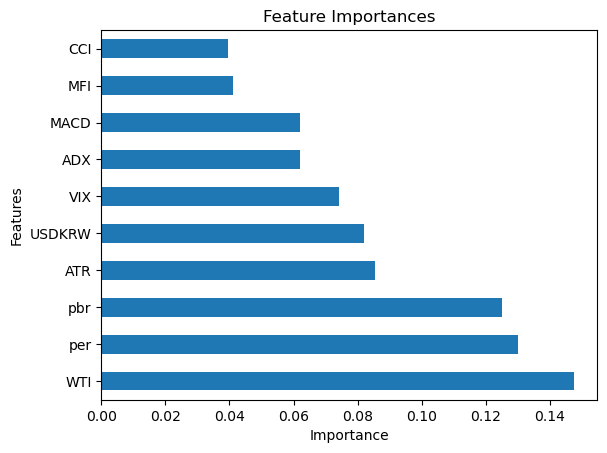

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
data_scaled = pd.read_csv('Scaled.csv')

# Label Encoding
le = LabelEncoder()
data_scaled['forward_stage'] = le.fit_transform(data_scaled['forward_stage'])

# 특성과 레이블 분리
X = data_scaled.drop(columns=['Date', 'forward_stage'])
y = data_scaled['forward_stage']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화 및 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측 수행
predictions = rf_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# 평가 결과 출력
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_rep)

# 특성 중요도 시각화
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 교차 검증 수행 (cv는 분할 횟수를 나타냄)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard deviation of accuracy: {np.std(cv_scores):.2f}')


Cross-validation scores: [0.48116438 0.43321918 0.26027397 0.4271012  0.28301887]
Mean accuracy: 0.38
Standard deviation of accuracy: 0.09
